# EDA for new song list output vars

In [1]:
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

import pylab 
import scipy.stats as stats
from fitter import Fitter, get_common_distributions, get_distributions

#nltk imports
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

import warnings
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
#create a df from csv
filename = "Final_DF.csv"
ldf= pd.read_csv(filename)
ldf.rename(columns={ 'Unnamed: 0': 'track_name'}, inplace=True)
ldf.head()

track_name  track_name                track_id  playlist_name  \
0           0           0  3YBZIN3rekqsKxbJc9FZko  Rock Classics   
1           1           1  2zYzyRzz6pRmhPzyfMEC8s  Rock Classics   
2           2           2  5MxNLUsfh7uzROypsoO5qe  Rock Classics   
3           3           3  70LcF31zb1H0PyJoS1Sx1r  Rock Classics   
4           4           4  4bHsxqR3GMrXTxEPLuK5ue  Rock Classics   

              playlist_id playlist_genre          track_name.1  \
0  37i9dQZF1DWXRqgorJj26U           Rock         Paradise City   
1  37i9dQZF1DWXRqgorJj26U           Rock       Highway to Hell   
2  37i9dQZF1DWXRqgorJj26U           Rock              Dream On   
3  37i9dQZF1DWXRqgorJj26U           Rock                 Creep   
4  37i9dQZF1DWXRqgorJj26U           Rock  Don't Stop Believin'   

  track_artist_name         track_artist_id  danceability  ...  \
0     Guns N' Roses  3qm84nBOXUEQ2vnTfUTTFC         0.273  ...   
1             AC/DC  711MCceyCBcFnzjGY4Q7Un         0.574  ...   
2         Aerosmith  7Ey4PD4MYsKc5I2dolUwbH         0.307  ...   
3         Radiohead  4Z8W4fKeB5YxbusRsdQVPb         0.515  ...   
4           Journey  0rvjqX7ttXeg3mTy8Xscbt         0.500  ...   

                                        dirty_lyrics  \
0  [Chorus]\nTake me down to the Paradise City\nW...   
1  [Instrumental Intro]\n\n[Verse 1]\nLiving easy...   
2  [Verse 1]\nEvery time​ that I look in the mirr...   
3  [Verse 1]\nWhen you were here before\nCouldn't...   
4  [Verse 1]\nJust a small-town girl\nLivin' in a...   

                                        clean_lyrics  \
0  \nTake me down to the Paradise City\nWhere the...   
1  \n\n\nLiving easy, lovin' free\nSeason ticket ...   
2  \nEvery time​ that I look in the mirror\nAll t...   
3  \nWhen you were here before\nCouldn't look you...   
4  \nJust a small-town girl\nLivin' in a lonely w...   

                                       words_for_LDA  \
0  ['take', 'paradise', 'city', 'grass', 'green',...   
1  ['living', 'easy', 'lovin', 'free', 'ticket', ...   
2  ['time', 'look', 'mirror', 'line', 'face', 'ge...   
3  ['look', 'eye', 'skin', 'cry', 'float', 'feath...   
4  ['small', 'town', 'girl', 'livin', 'lonely', '...   

                                          clean_tabs  greer_key  \
0  G,C,F,C,G,G5,F5,C5,A#5,C5,C5,A#5,G,F,G,G,G,C,C...          0   
1  A,D/F#,G,D/F#,G,D/F#,G,D/F#,A,A,A,A,D/F#,D/F#,...          2   
2  Fm,Cm/F,Fm6,A#m6,Fm,C7sus,Fm,Fm,Fm7,Fm6,A#m6,F...          8   
3  G,B,C,Cm,G,B,C,Cm,G,B,C,Cm,G,B,C,Cm,G,B,C,Cm,G...          0   
4  E,B,C#m,A,E,B,G#m,A,E,B,C#m,A,E,B,G#m,A,E,B,C#...          4   

   firstNote_key  lastNote_key bestChoice_key  \
0              7             7              7   
1              9             9              9   
2              5             0              8   
3              7             7              7   
4              4             9              4   

                                        text2emotion  \
0  {'Happy': 0.17952380952380956, 'Angry': 0.0533...   
1  {'Happy': 0.1111111111111111, 'Angry': 0.03666...   
2  {'Happy': 0.0, 'Angry': 0.18181818181818182, '...   
3  {'Happy': 0.384, 'Angry': 0.0, 'Surprise': 0.3...   
4  {'Happy': 0.03666666666666667, 'Angry': 0.0277...   

                                       vader_emotion  
0  {'pos': 0.4732857142857143, 'neg': 0.055761904...  
1  {'pos': 0.15900000000000003, 'neg': 0.46299999...  
2  {'pos': 0.3417272727272727, 'neg': 0.063, 'neu...  
3  {'pos': 0.492, 'neg': 0.2702, 'neu': 0.2376000...  
4  {'pos': 0.14022222222222222, 'neg': 0.05755555...  

[5 rows x 30 columns]

In [4]:
ldf.columns

Index(['track_name', 'track_name', 'track_id', 'playlist_name', 'playlist_id',
       'playlist_genre', 'track_name.1', 'track_artist_name',
       'track_artist_id', 'danceability', 'energy', 'spotify_key', 'loudness',
       'mode', 'acousticness', 'valence', 'tempo', 'song_name', 'dirty_tabs',
       'capo', 'dirty_lyrics', 'clean_lyrics', 'words_for_LDA', 'clean_tabs',
       'greer_key', 'firstNote_key', 'lastNote_key', 'bestChoice_key',
       'text2emotion', 'vader_emotion'],
      dtype='object')

# Plotting Genre Distribution in Dataset

In [5]:
ldf.columns

Index(['track_name', 'track_name', 'track_id', 'playlist_name', 'playlist_id',
       'playlist_genre', 'track_name.1', 'track_artist_name',
       'track_artist_id', 'danceability', 'energy', 'spotify_key', 'loudness',
       'mode', 'acousticness', 'valence', 'tempo', 'song_name', 'dirty_tabs',
       'capo', 'dirty_lyrics', 'clean_lyrics', 'words_for_LDA', 'clean_tabs',
       'greer_key', 'firstNote_key', 'lastNote_key', 'bestChoice_key',
       'text2emotion', 'vader_emotion'],
      dtype='object')

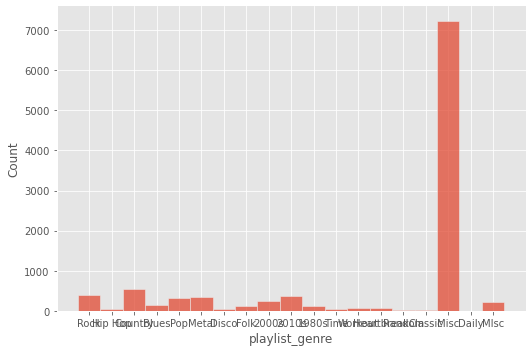

In [6]:
sns.displot(data=ldf, x='playlist_genre', aspect=1.5, stat='count')

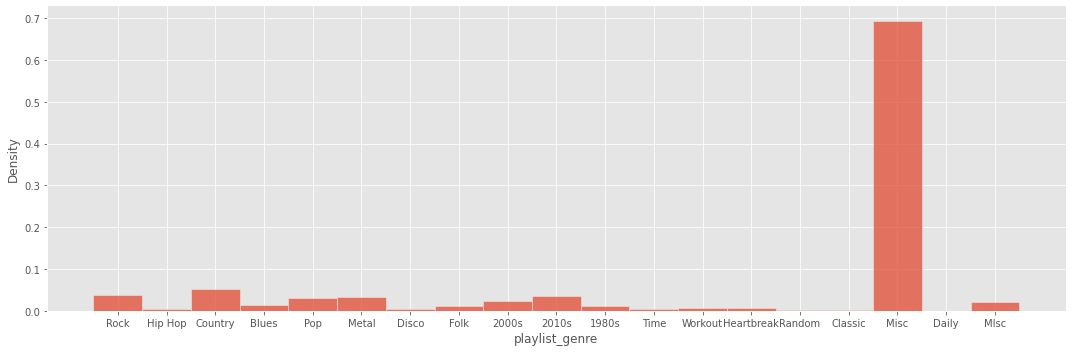

In [7]:
sns.displot(data=ldf, x='playlist_genre', aspect=3, stat='density')

# Plotting predicted variable distributions

Source: 
1. https://towardsdatascience.com/10-examples-to-master-distribution-plots-with-python-seaborn-4ea2ceea906a
2. https://www.c-sharpcorner.com/article/a-complete-python-seaborn-tutorial/

In [8]:
vars = ldf.columns.to_list()
vars = vars[9:17]
vars

['danceability',
 'energy',
 'spotify_key',
 'loudness',
 'mode',
 'acousticness',
 'valence',
 'tempo']

### Histogram

In [9]:
#https://stackoverflow.com/questions/69059121/how-to-draw-a-normal-curve-on-seaborn-displot
def map_pdf(x, **kwargs):
    mu, std = scipy.stats.norm.fit(x)
    x0, x1 = p1.axes[0][0].get_xlim()  # axes for p1 is required to determine x_pdf
    x_pdf = np.linspace(x0, x1, 100)
    y_pdf = scipy.stats.norm.pdf(x_pdf, mu, std)
    plt.plot(x_pdf, y_pdf, c='r')

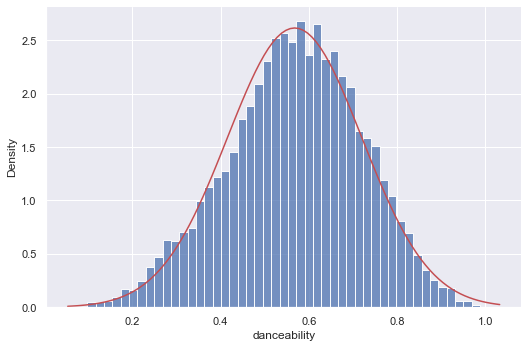

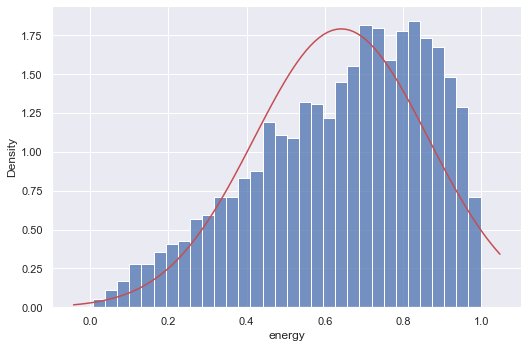

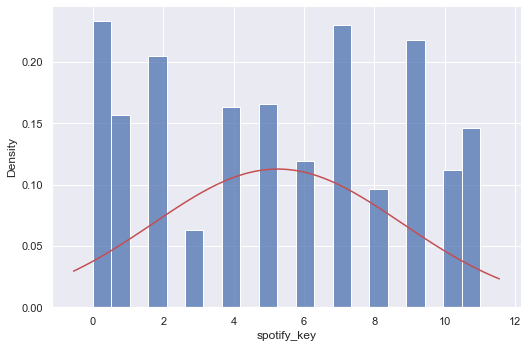

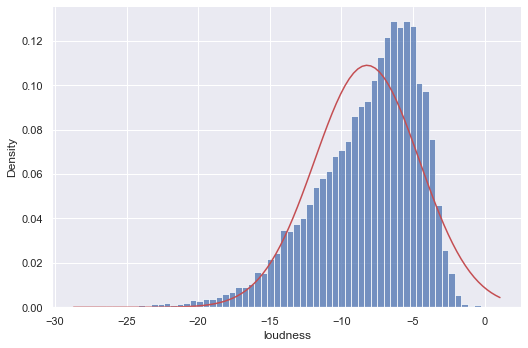

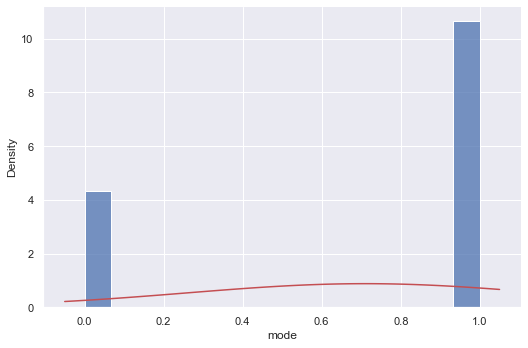

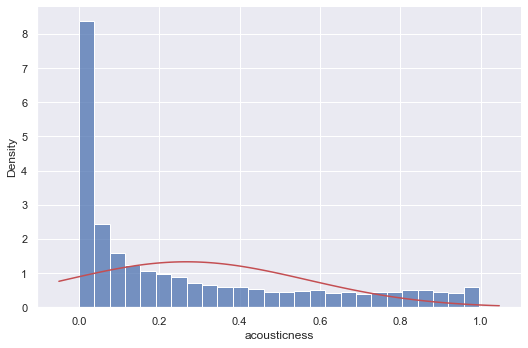

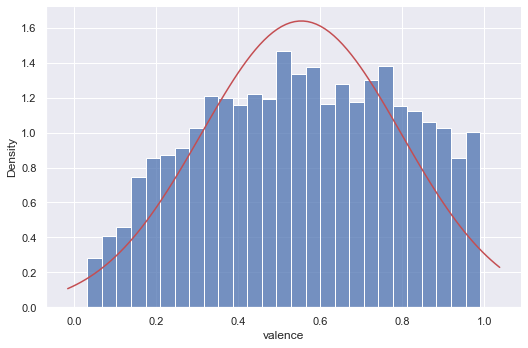

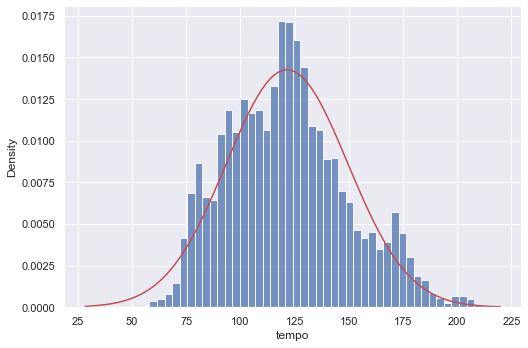

In [10]:
sns.set_theme()
for var in vars:
    p1 = sns.displot(data=ldf, x=var, aspect=1.5, stat='density')
    p1.map(map_pdf, var)

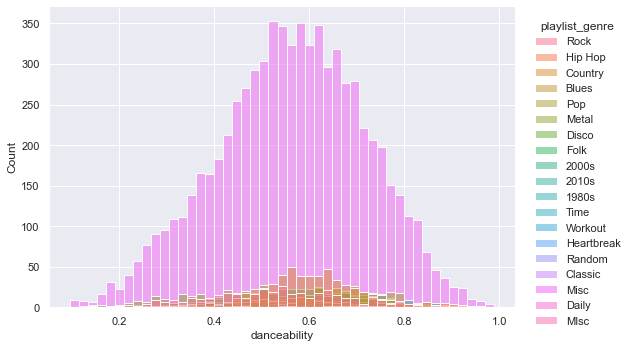

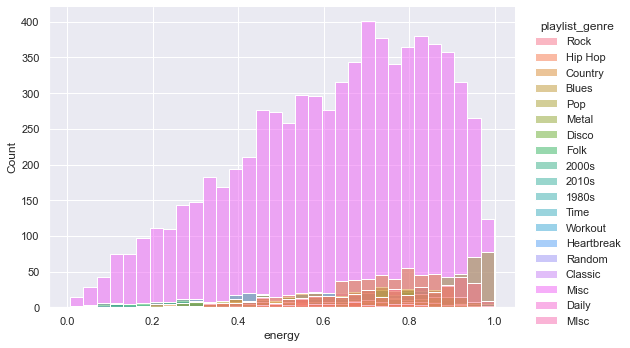

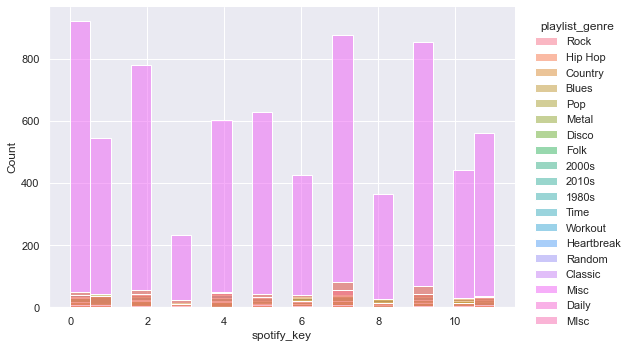

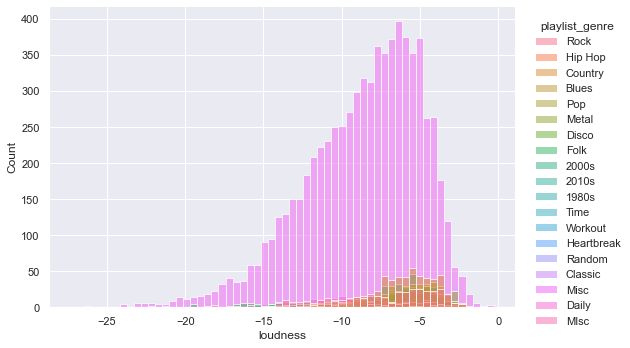

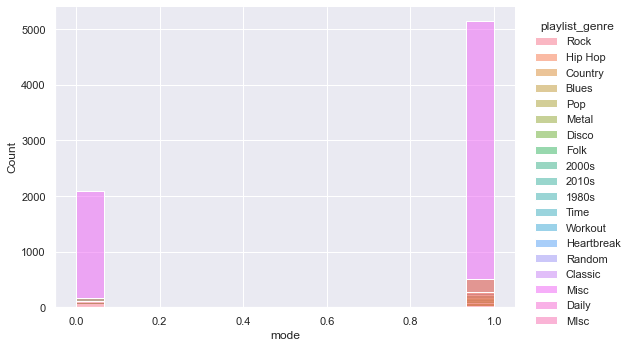

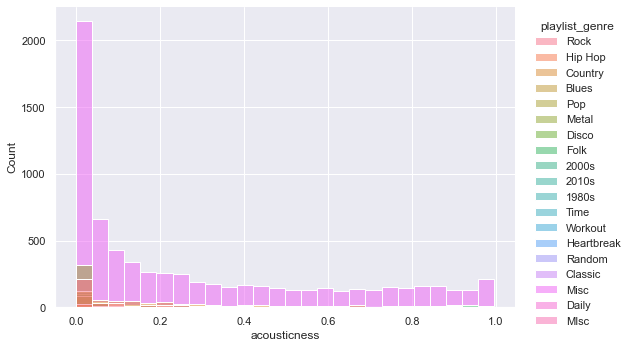

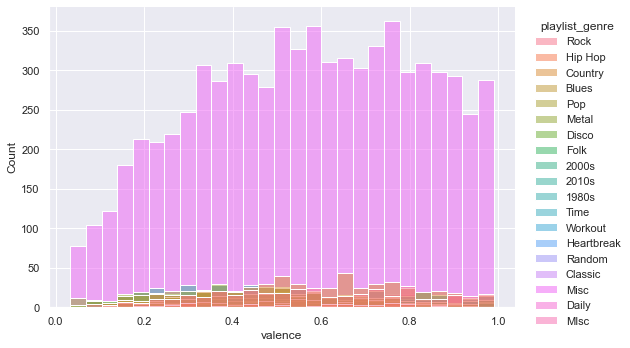

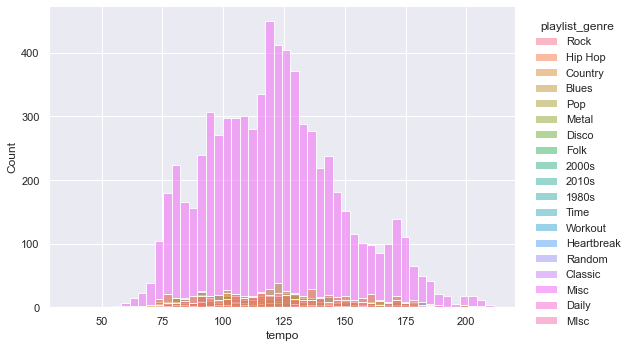

In [11]:
for var in vars:
    sns.displot(data=ldf, x=var, hue='playlist_genre', kind='hist', aspect=1.5)

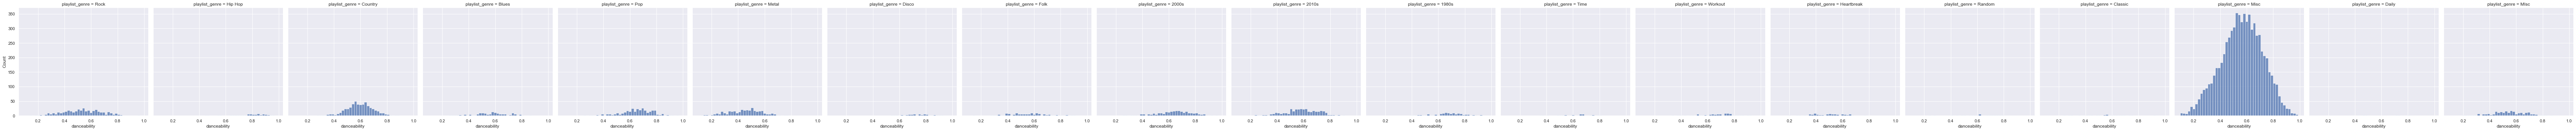

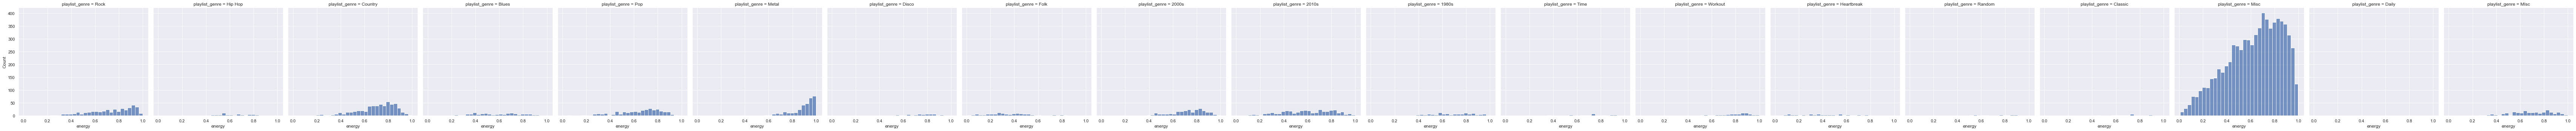

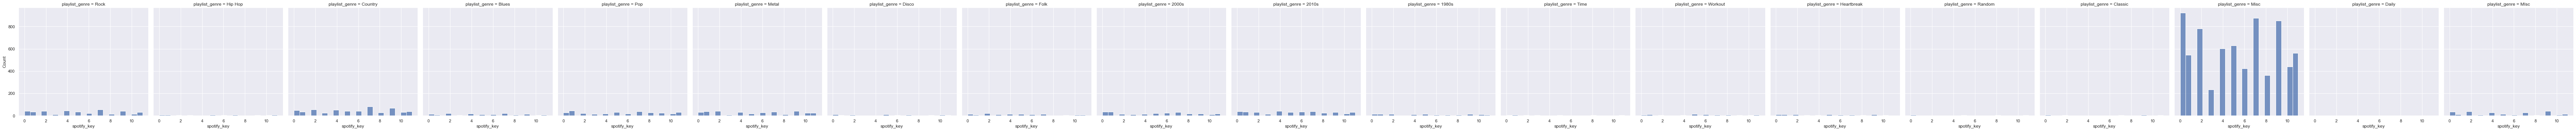

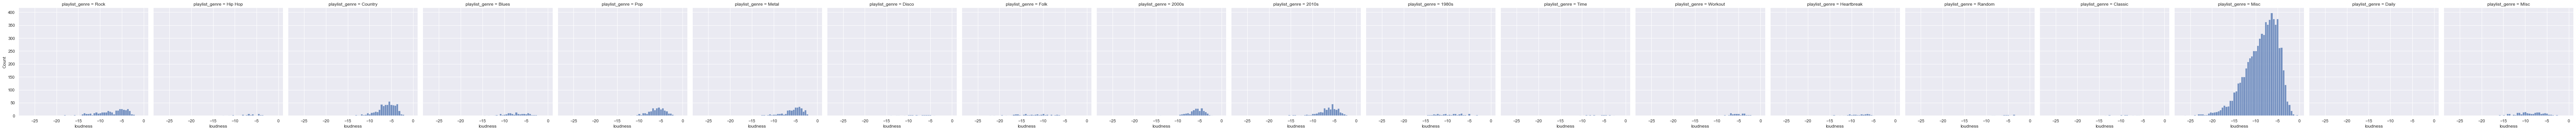

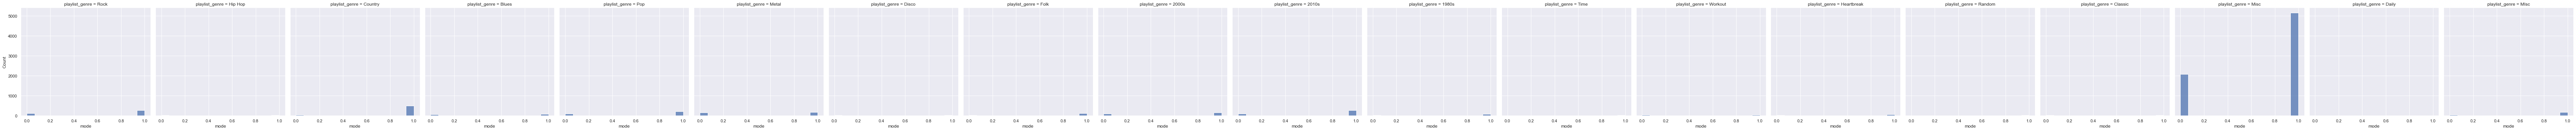

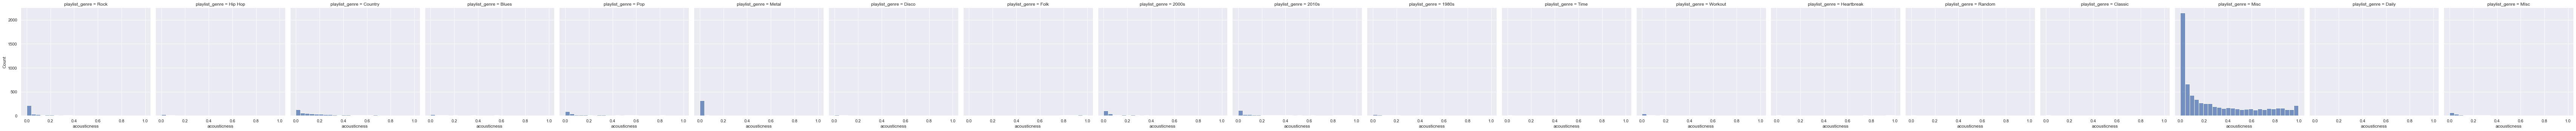

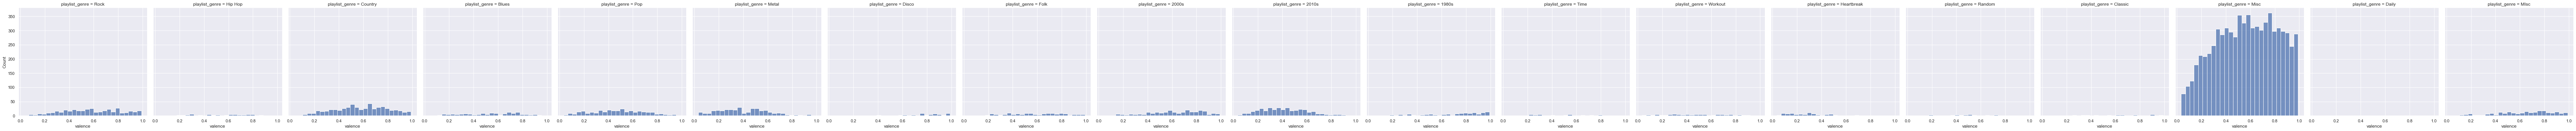

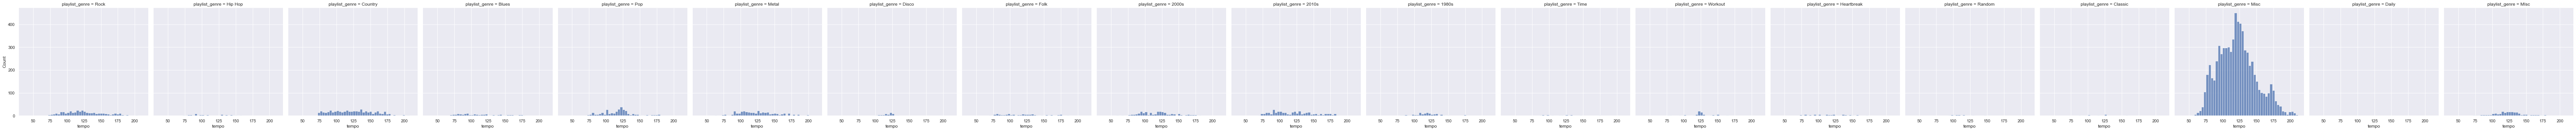

In [12]:
for var in vars:
    sns.displot(data=ldf, x=var, col='playlist_genre', kind='hist', aspect=1)

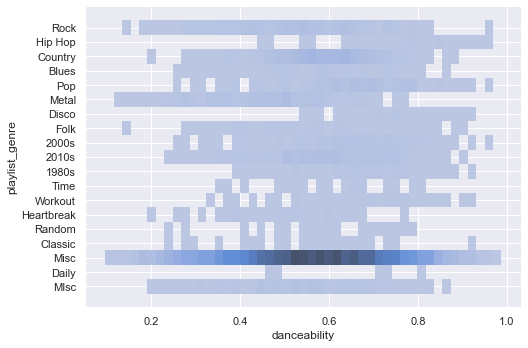

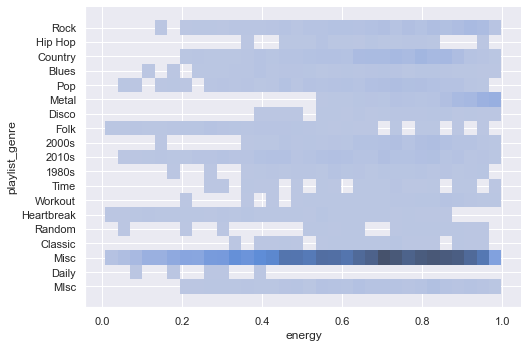

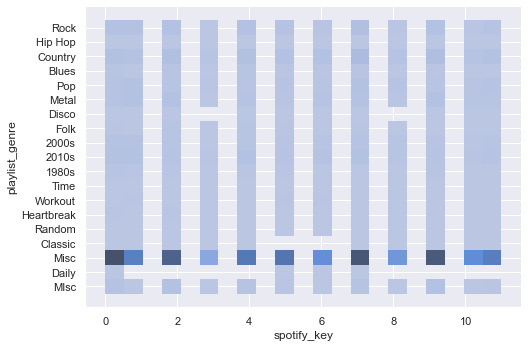

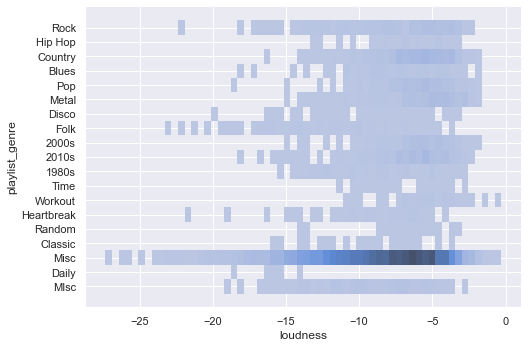

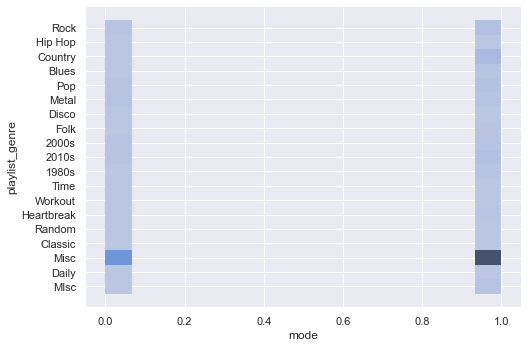

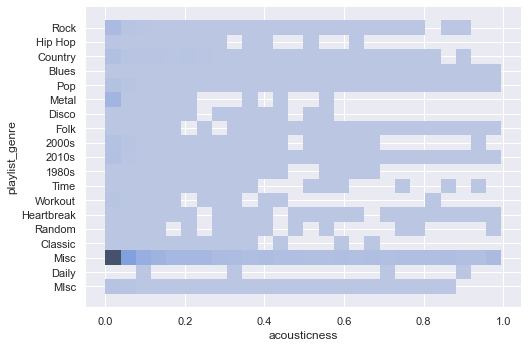

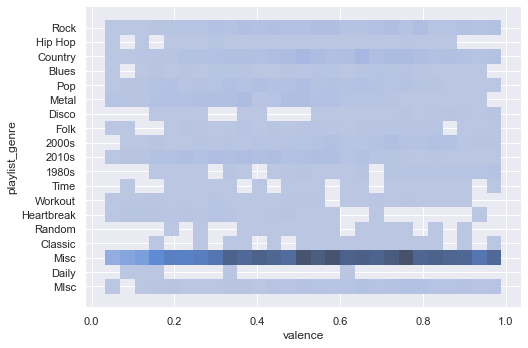

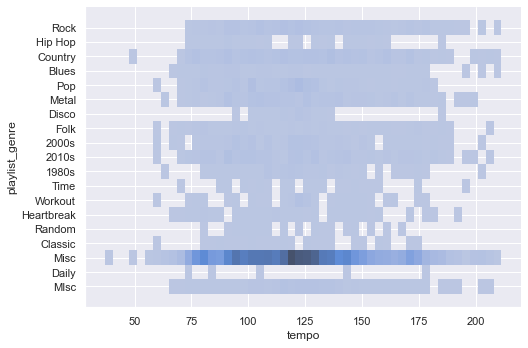

In [13]:
for var in vars:
    sns.displot(data=ldf, x=var, y='playlist_genre', kind='hist', aspect=1.5)

### KDE

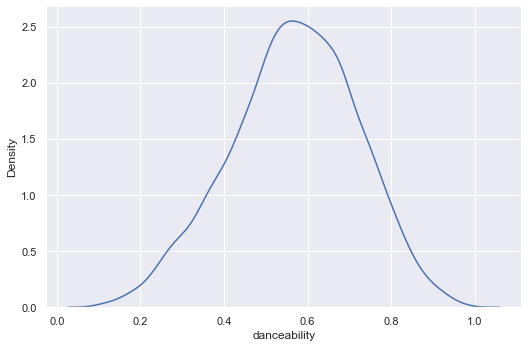

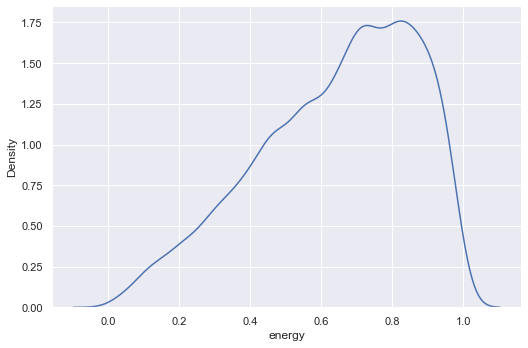

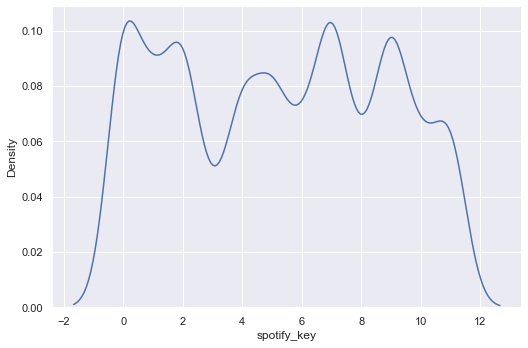

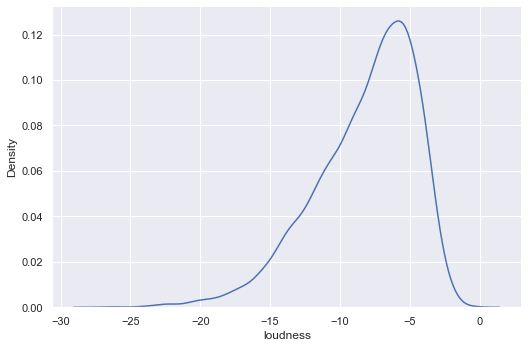

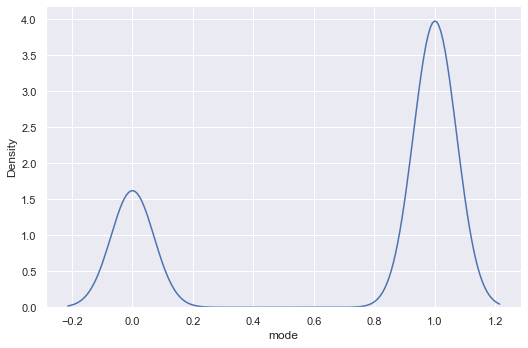

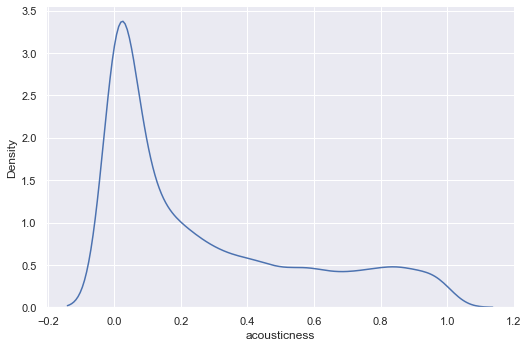

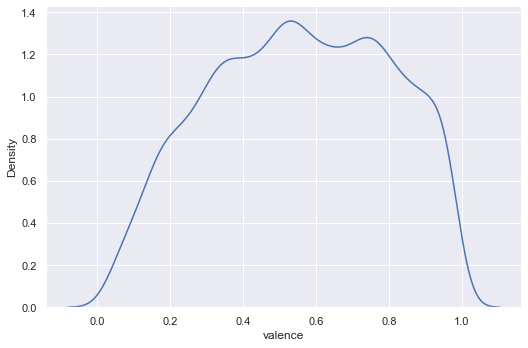

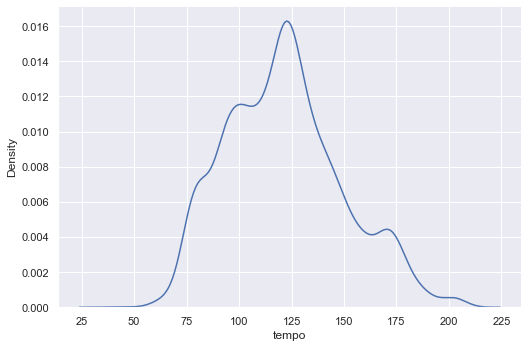

In [14]:
for var in vars:
    sns.displot(data=ldf, x=var, kind='kde', aspect=1.5)

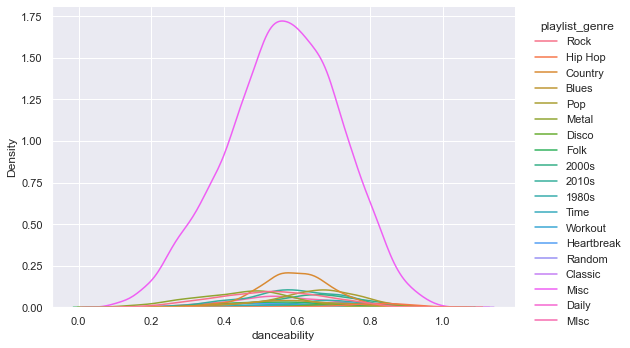

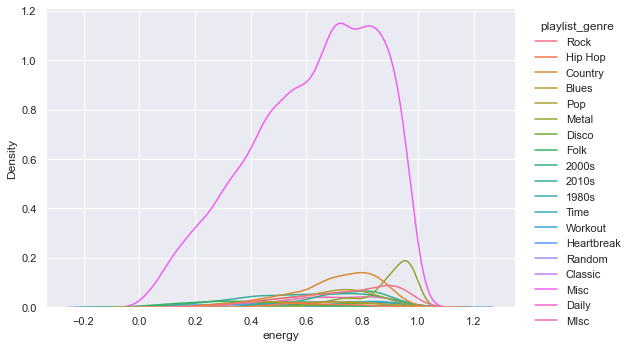

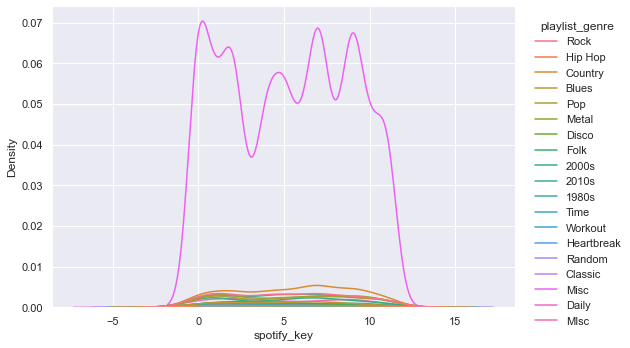

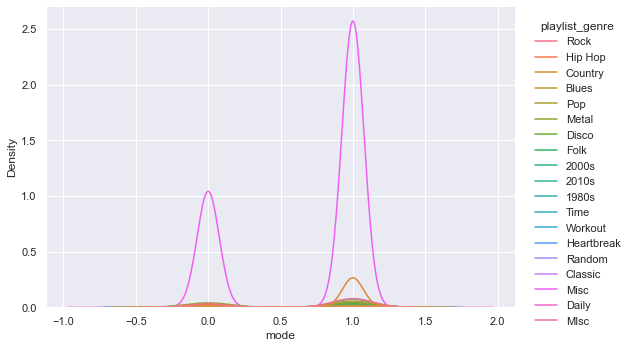

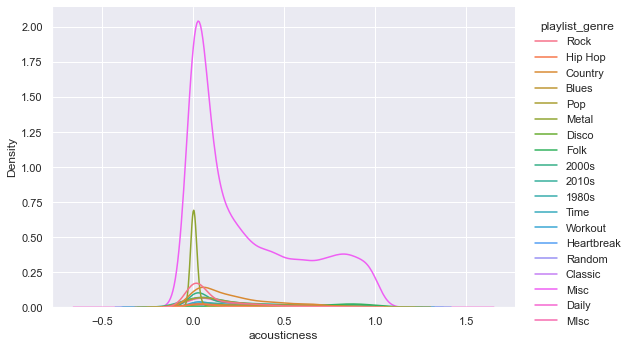

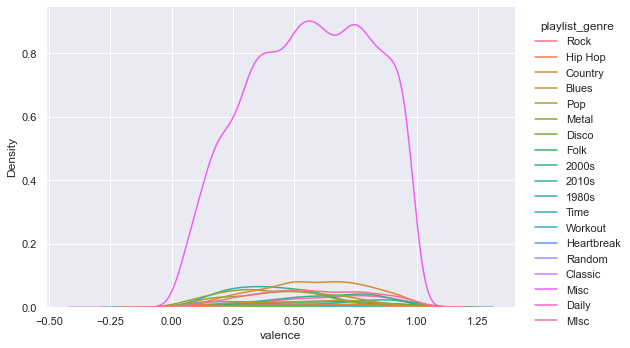

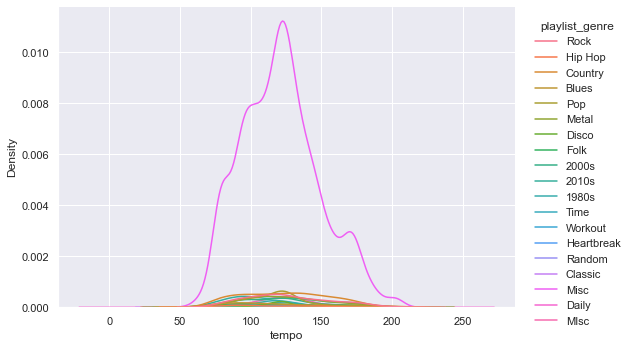

In [15]:
for var in vars:
    sns.displot(data=ldf, x=var, hue='playlist_genre', kind='kde', aspect=1.5)

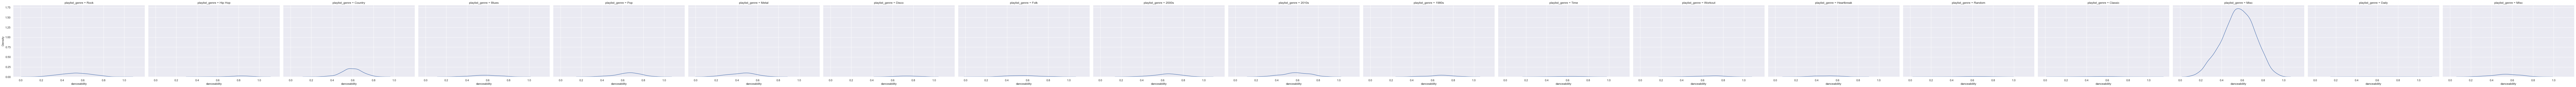

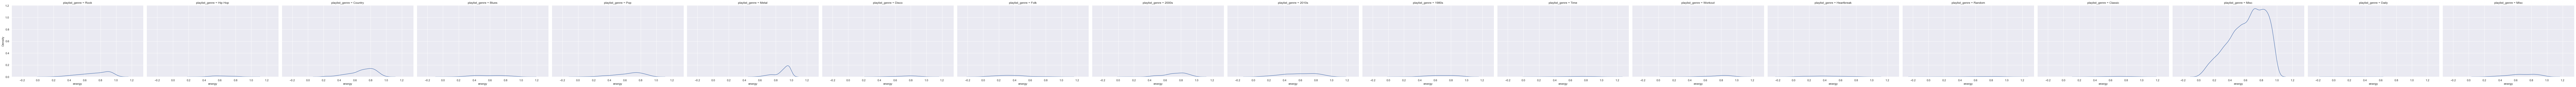

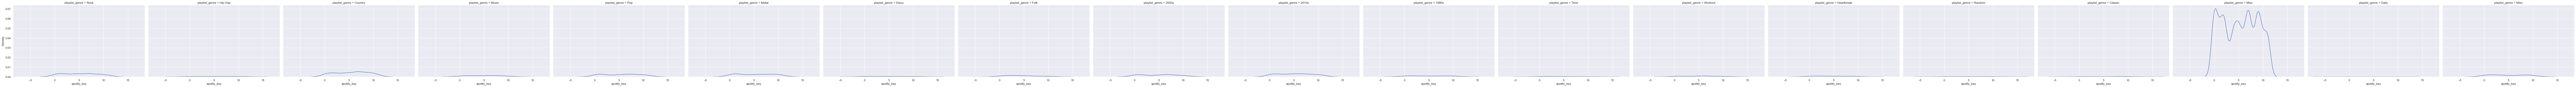

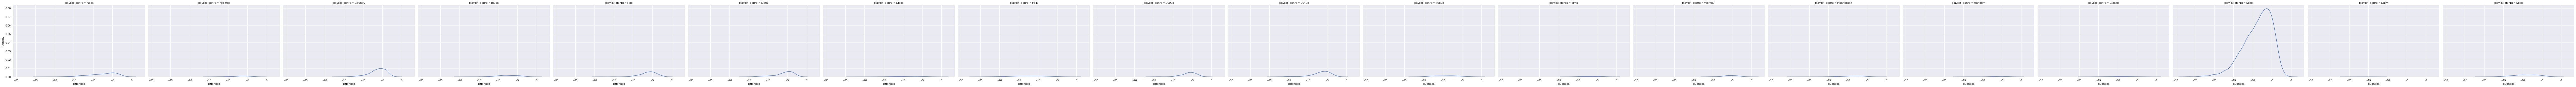

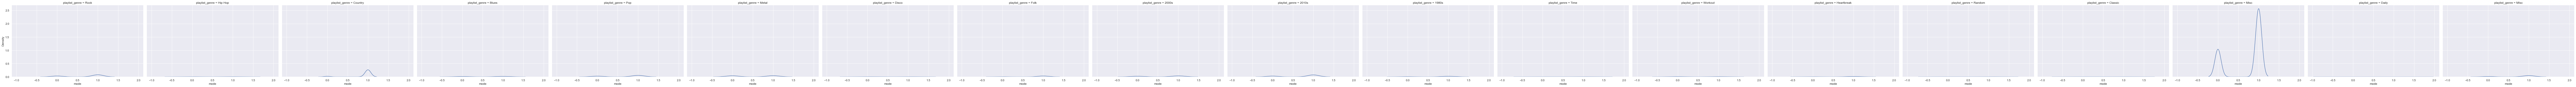

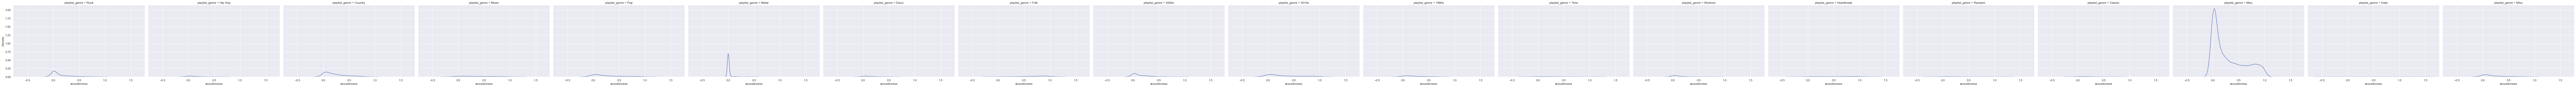

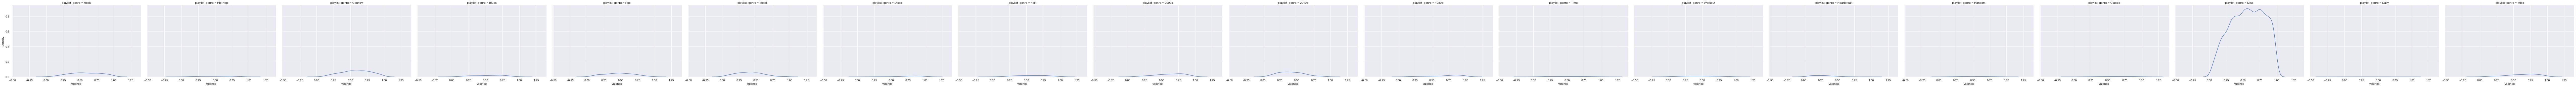

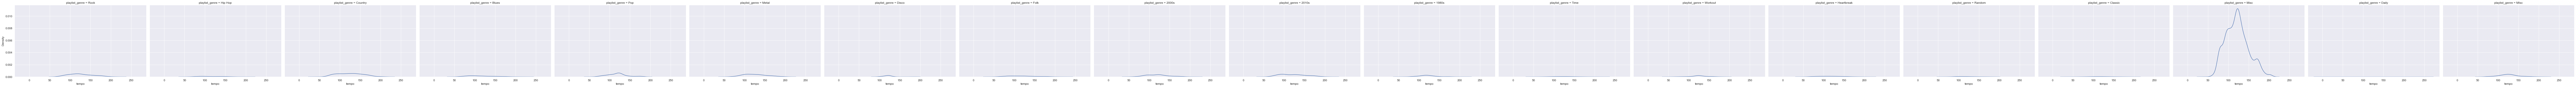

In [16]:
for var in vars:
    sns.displot(data=ldf, x=var, col='playlist_genre', kind='kde', aspect=1.5)

### ECDF

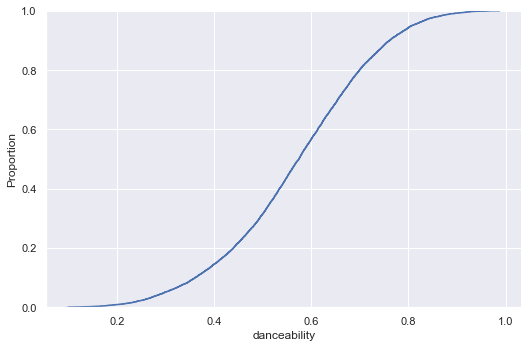

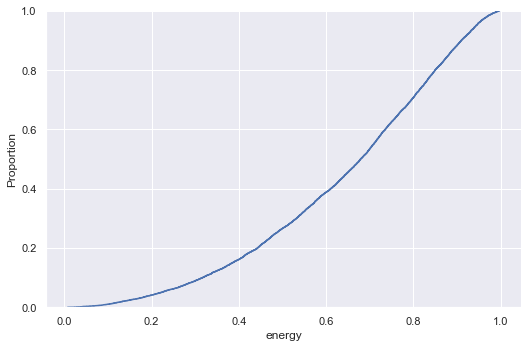

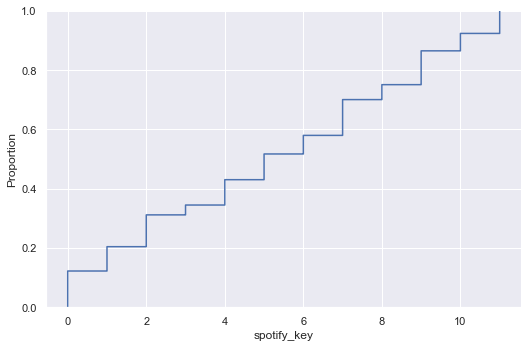

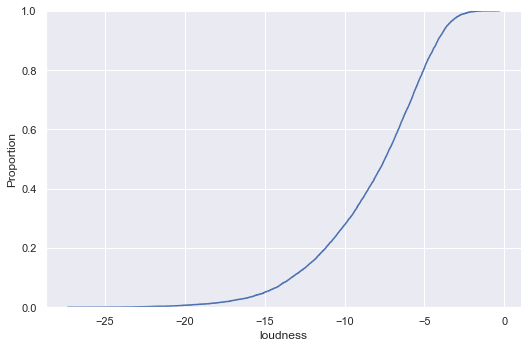

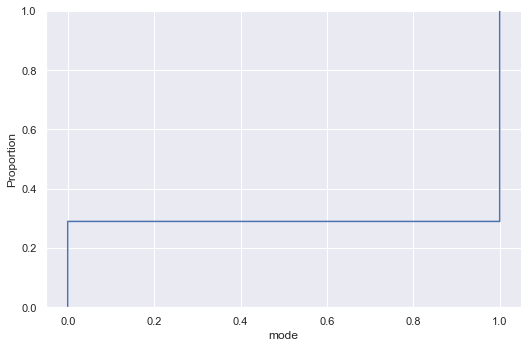

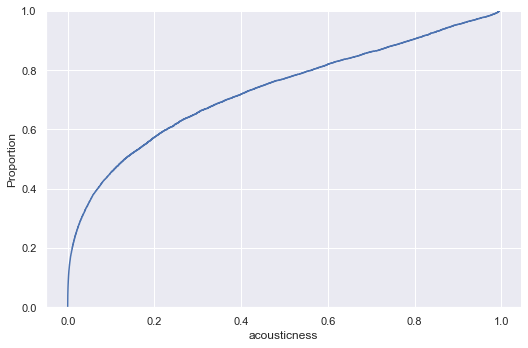

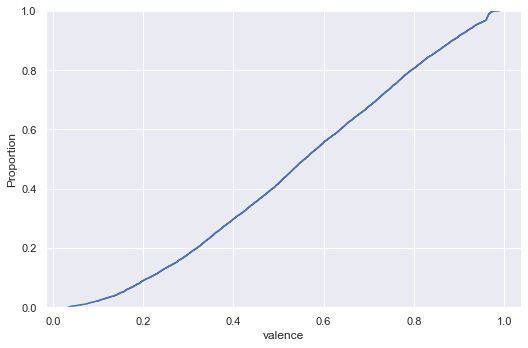

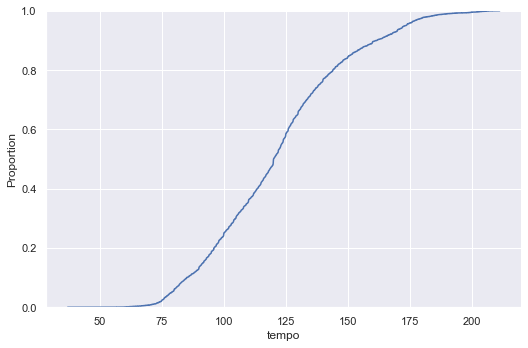

In [17]:
for var in vars:
    sns.displot(data=ldf, x=var, kind='ecdf', aspect=1.5)

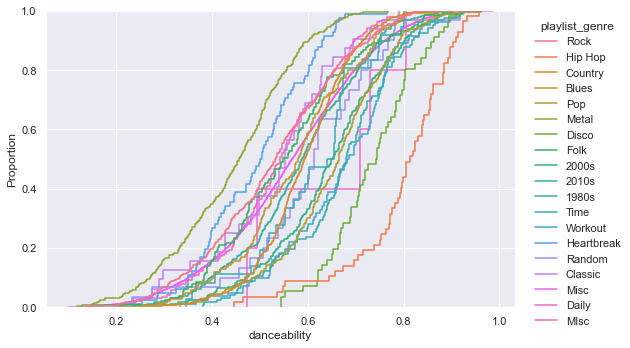

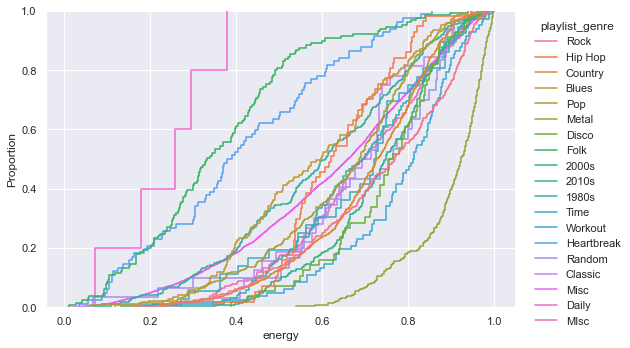

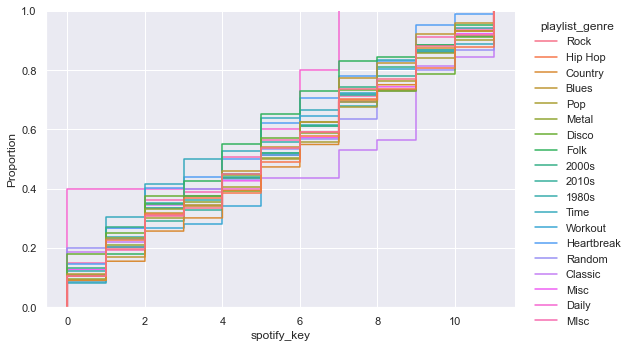

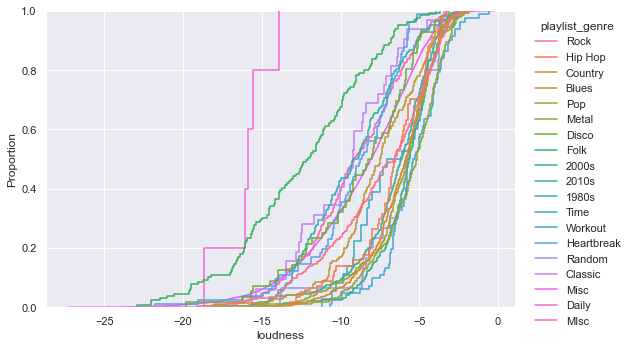

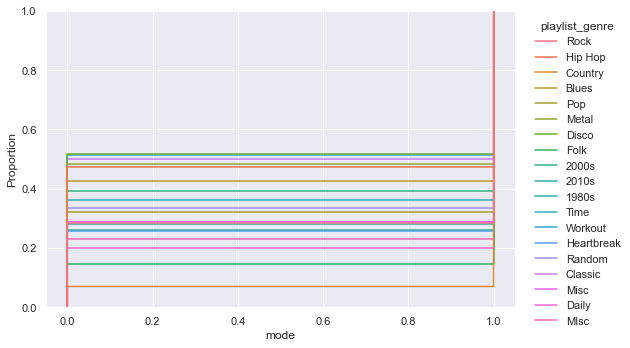

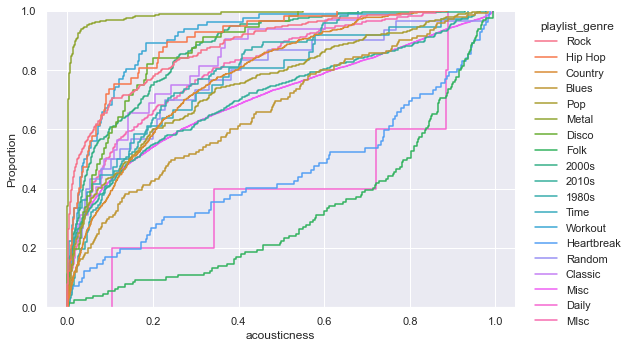

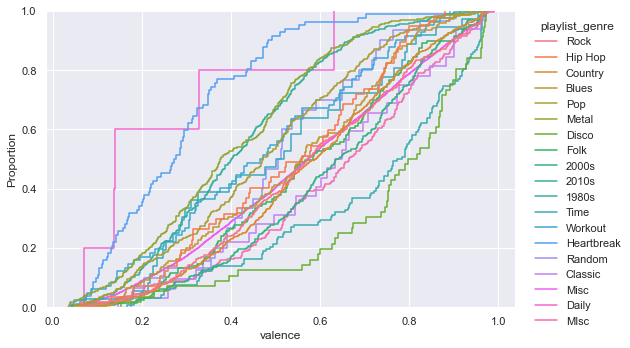

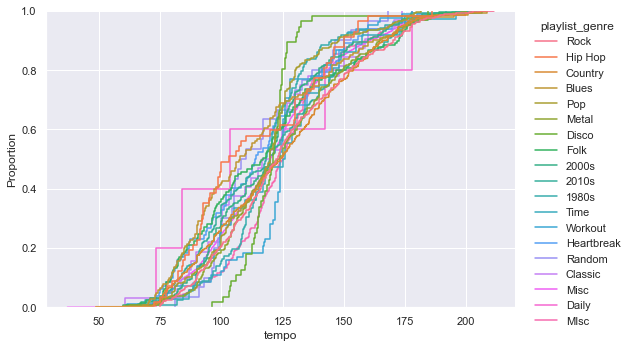

In [18]:
for var in vars:
    sns.displot(data=ldf, x=var, hue='playlist_genre', kind='ecdf', aspect=1.5)

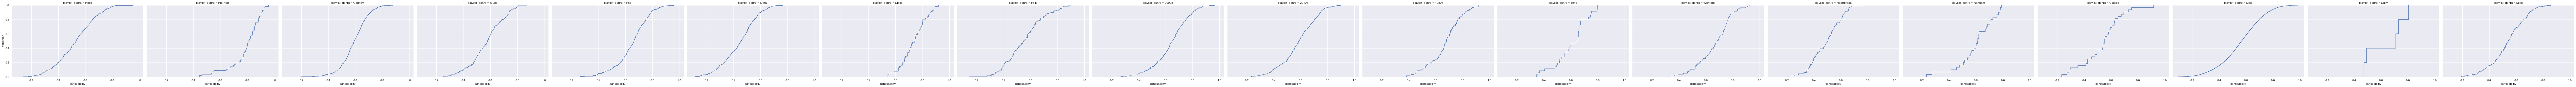

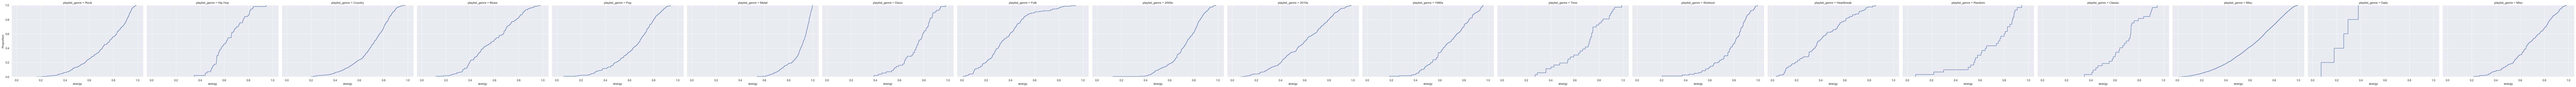

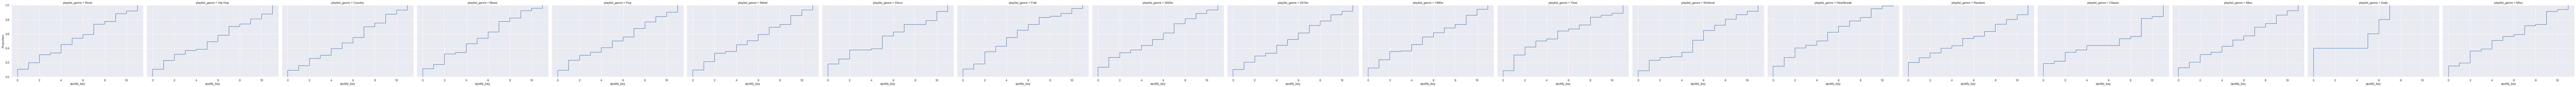

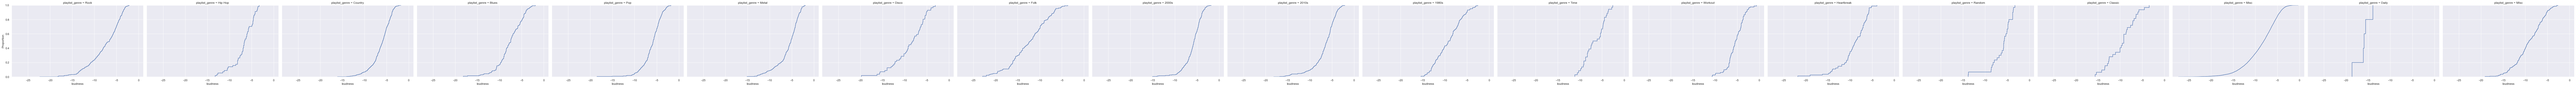

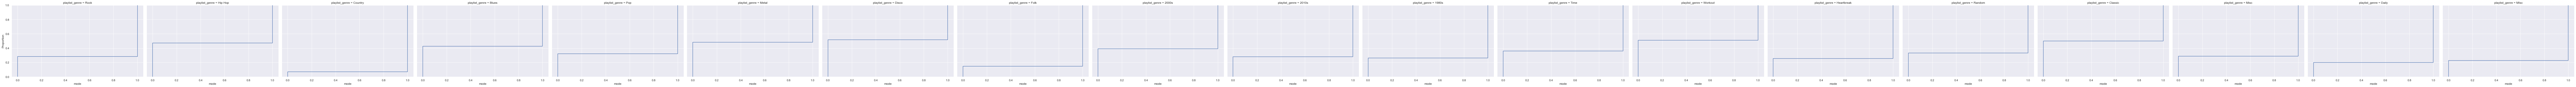

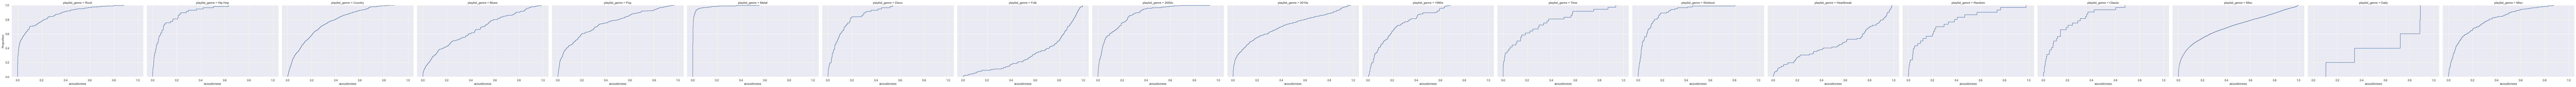

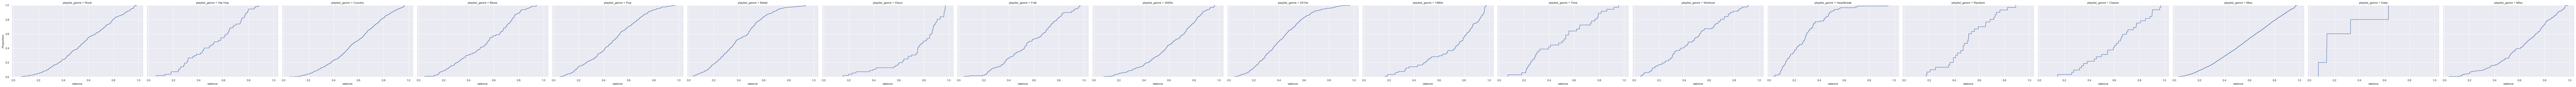

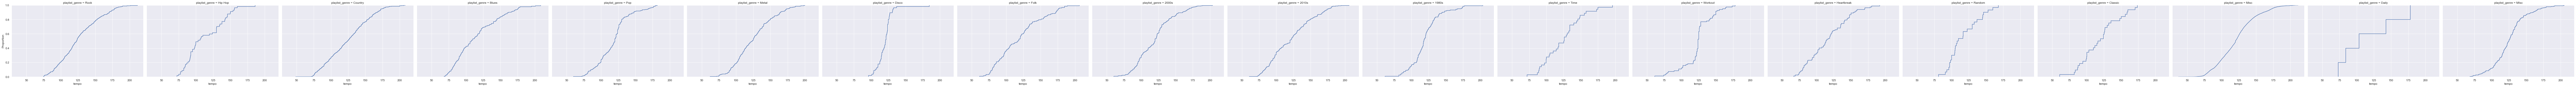

In [19]:
for var in vars:
    sns.displot(data=ldf, x=var, col='playlist_genre', kind='ecdf', aspect=1.5)

### QQ plot for normality

Source - https://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy

danceability


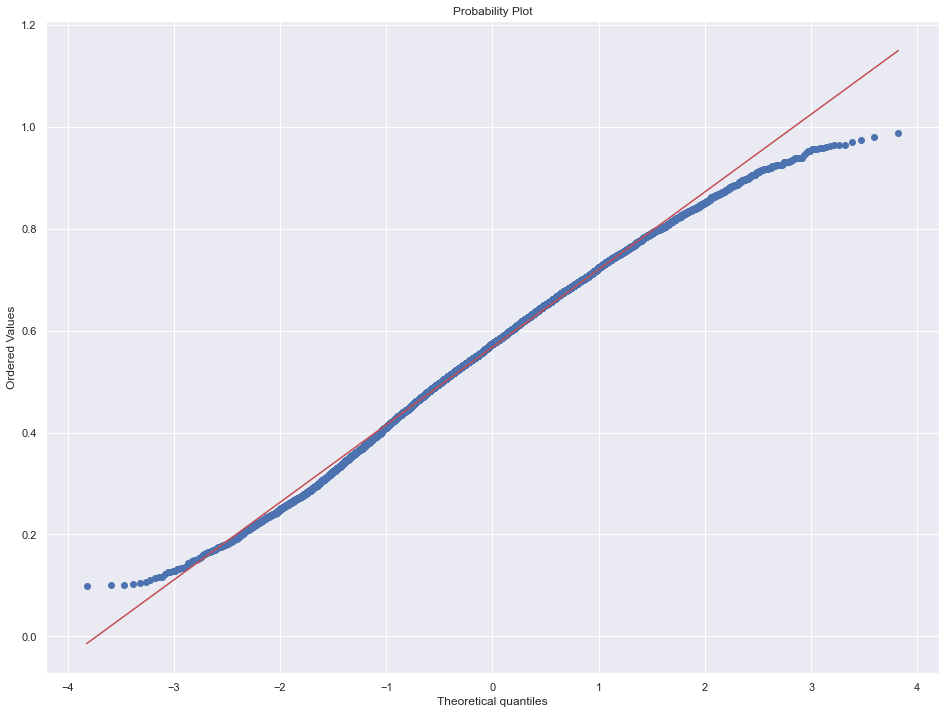

energy


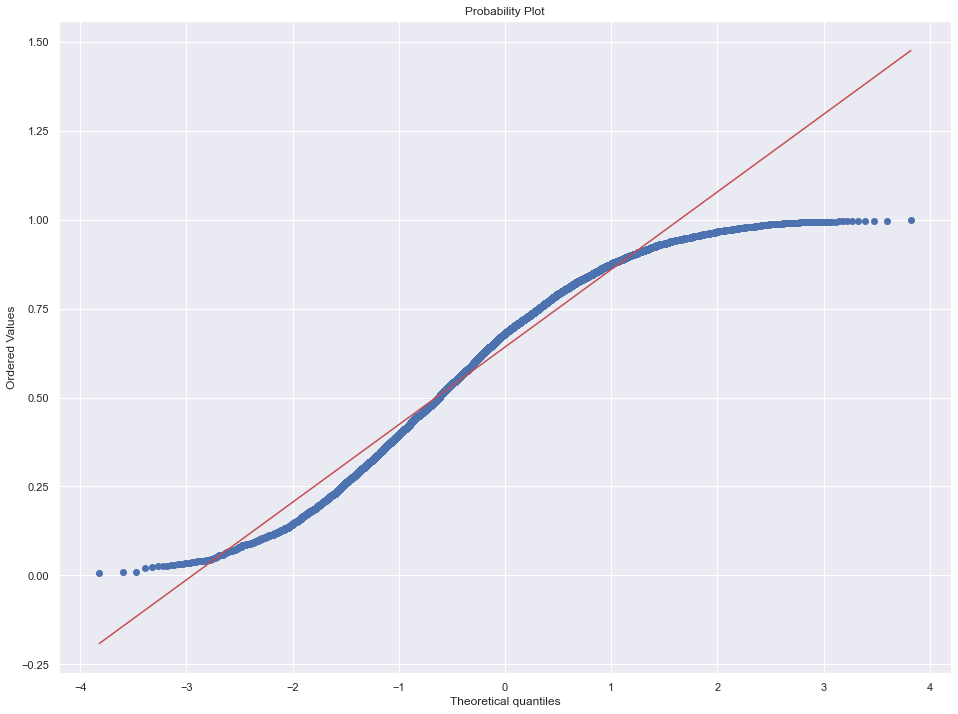

spotify_key


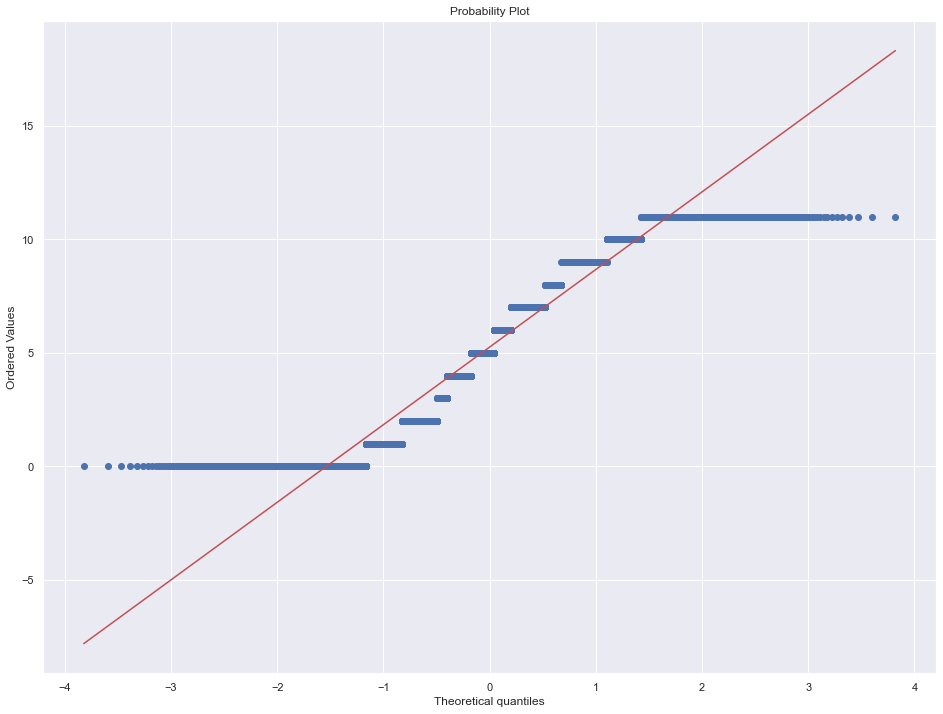

loudness


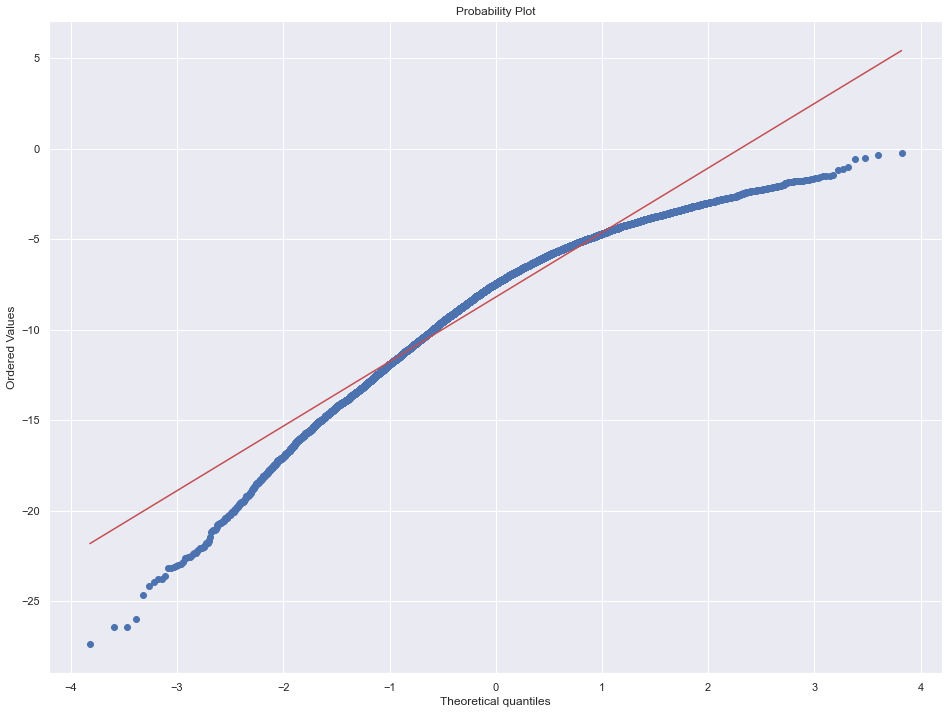

mode


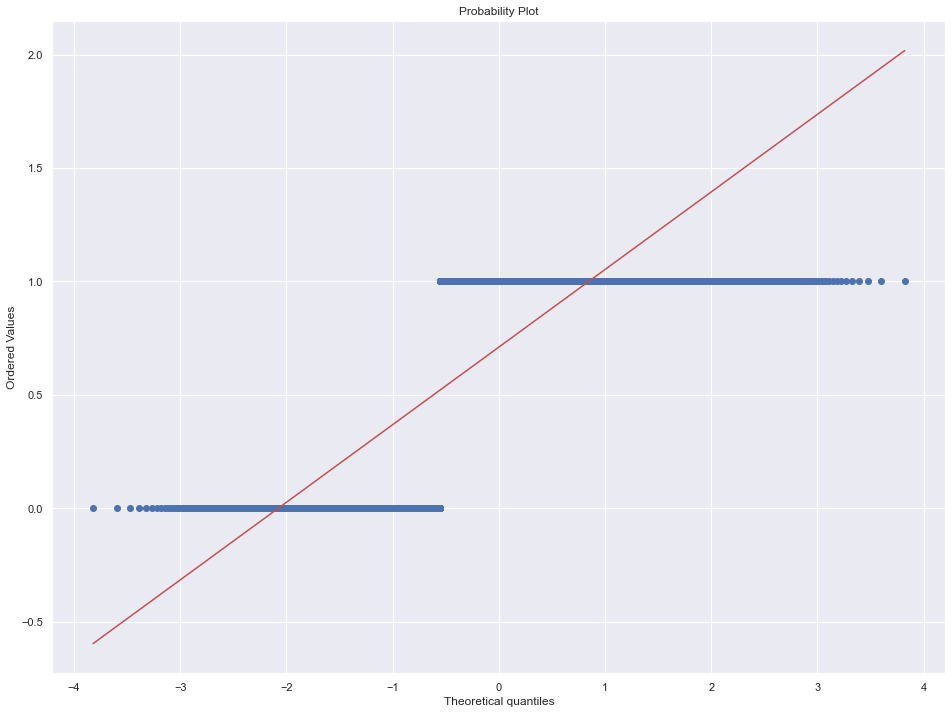

acousticness


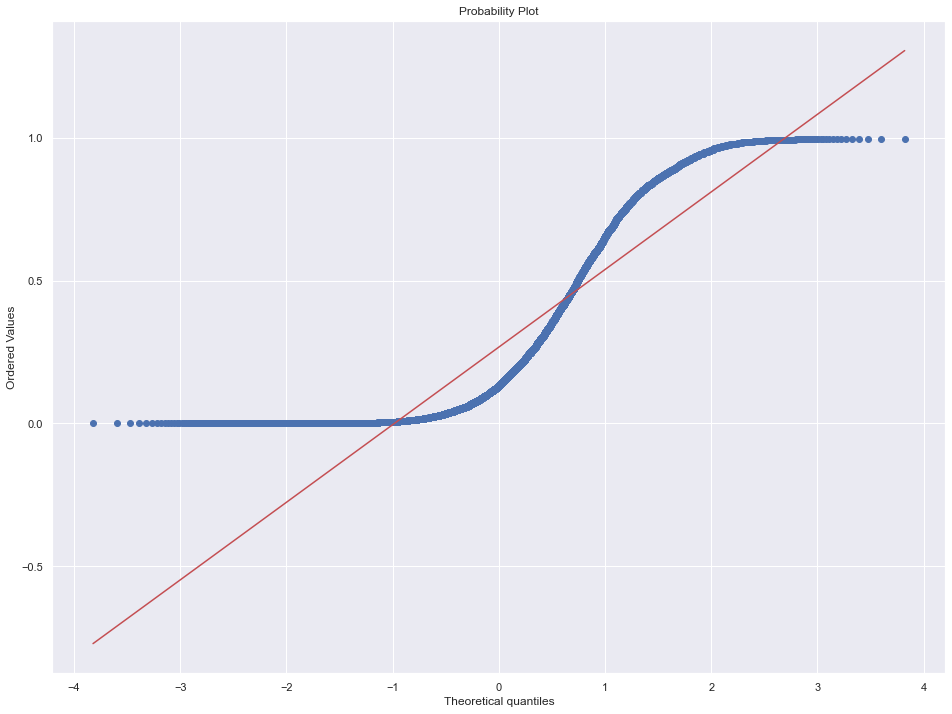

valence


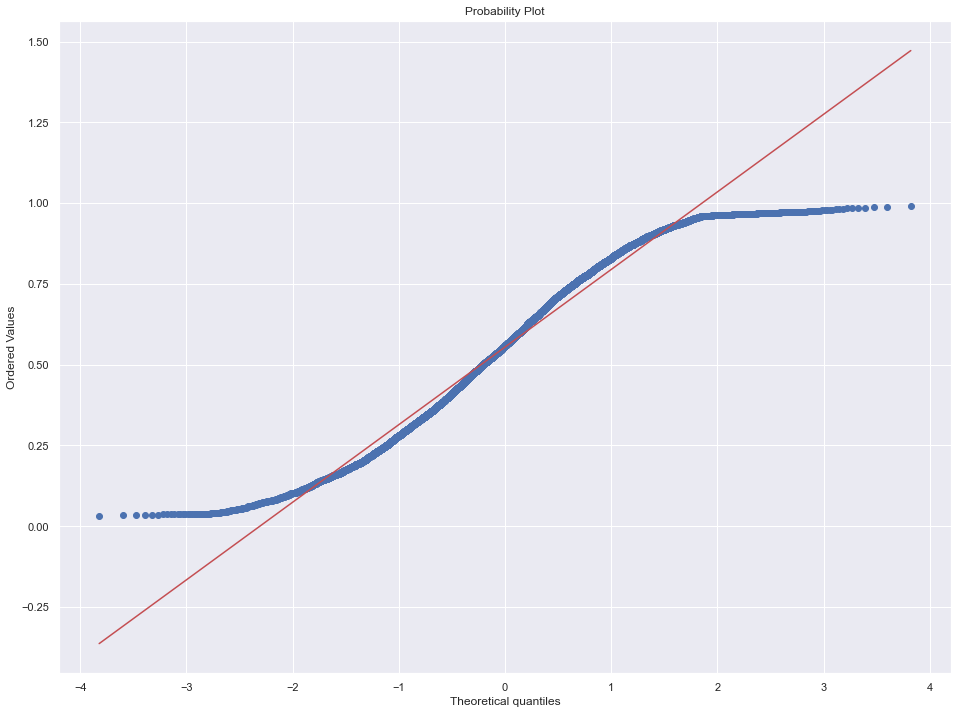

tempo


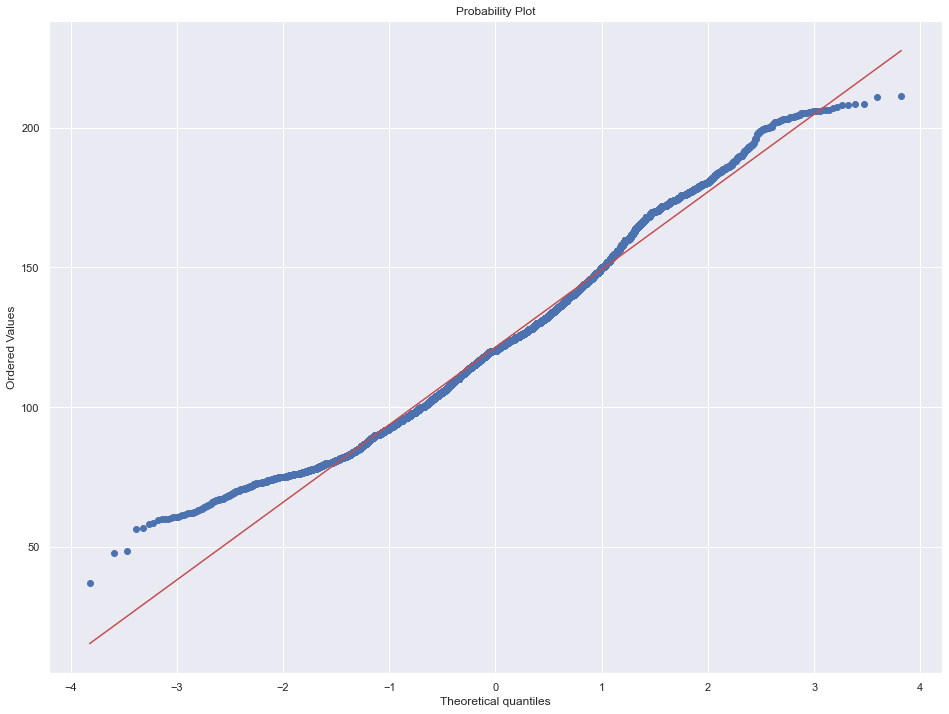

In [20]:
for var in vars:
    print(var)
    stats.probplot(ldf[var], dist="norm", plot=pylab)
    pylab.show()

### Fitting Distributions

Source:

1. https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

In [21]:
# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [22]:
def plot_distributions(var):
    
    # Load data from statsmodels datasets
    data = ldf[var]
    
    # Plot for comparison
    plt.figure(figsize=(12,8))
    ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5,   color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

    # Save plot limits
    dataYLim = ax.get_ylim()

    # Find best fit distribution
    best_distibutions = best_fit_distribution(data, 200, ax)
    best_dist = best_distibutions[0]

    # Update plots
    ax.set_ylim(dataYLim)
    ax.set_title(var+u'All Fitted Distributions')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

    # Make PDF with best params 
    pdf = make_pdf(best_dist[0], best_dist[1])

    # Display
    plt.figure(figsize=(12,8))
    ax = pdf.plot(lw=2, label='PDF', legend=True)
    data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

    param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
    dist_str = '{}({})'.format(best_dist[0].name, param_str)

    ax.set_title(var + u'with best fit distribution \n' + dist_str)
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

#### plotting for continuous vars 

danceability
  1 / 104: ksone
  2 / 104: kstwo
  3 / 104: kstwobign
  4 / 104: norm
  5 / 104: alpha
  6 / 104: anglit
  7 / 104: arcsine
  8 / 104: beta
  9 / 104: betaprime
 10 / 104: bradford
 11 / 104: burr
 12 / 104: burr12
 13 / 104: fisk
 14 / 104: cauchy
 15 / 104: chi
 16 / 104: chi2
 17 / 104: cosine
 18 / 104: dgamma
 19 / 104: dweibull
 20 / 104: expon
 21 / 104: exponnorm
 22 / 104: exponweib
 23 / 104: exponpow
 24 / 104: fatiguelife
 25 / 104: foldcauchy
 26 / 104: f
 27 / 104: foldnorm
 28 / 104: weibull_min
 29 / 104: weibull_max
 30 / 104: genlogistic
 31 / 104: genpareto
 32 / 104: genexpon
 33 / 104: genextreme
 34 / 104: gamma
 35 / 104: erlang
 36 / 104: gengamma
 37 / 104: genhalflogistic
 38 / 104: genhyperbolic
 39 / 104: gompertz
 40 / 104: gumbel_r
 41 / 104: gumbel_l
 42 / 104: halfcauchy
 43 / 104: halflogistic
 44 / 104: halfnorm
 45 / 104: hypsecant
 46 / 104: gausshyper
 47 / 104: invgamma
 48 / 104: invgauss
 49 / 104: geninvgauss
 50 / 104: norminvgaus

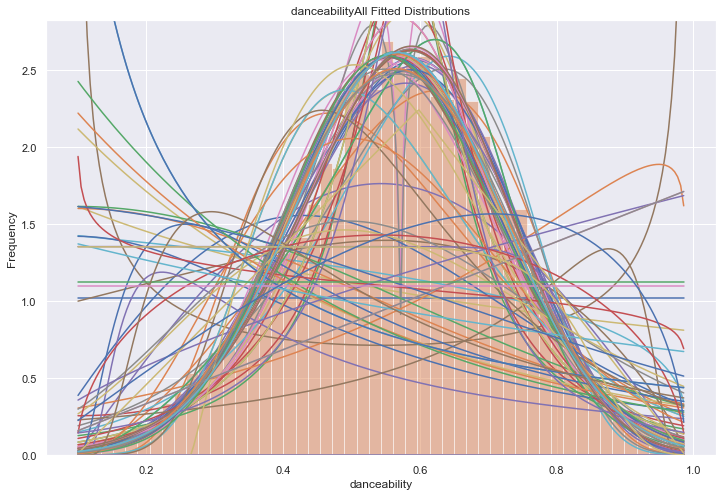

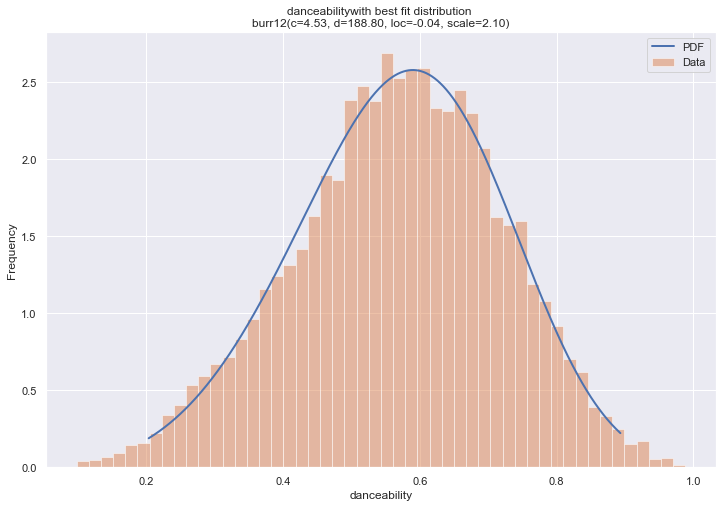

In [23]:
print(vars[0])
plot_distributions(vars[0])

energy
  1 / 104: ksone
  2 / 104: kstwo
  3 / 104: kstwobign
  4 / 104: norm
  5 / 104: alpha
  6 / 104: anglit
  7 / 104: arcsine
  8 / 104: beta
  9 / 104: betaprime
 10 / 104: bradford
 11 / 104: burr
 12 / 104: burr12
 13 / 104: fisk
 14 / 104: cauchy
 15 / 104: chi
 16 / 104: chi2
 17 / 104: cosine
 18 / 104: dgamma
 19 / 104: dweibull
 20 / 104: expon
 21 / 104: exponnorm
 22 / 104: exponweib
 23 / 104: exponpow
 24 / 104: fatiguelife
 25 / 104: foldcauchy
 26 / 104: f
 27 / 104: foldnorm
 28 / 104: weibull_min
 29 / 104: weibull_max
 30 / 104: genlogistic
 31 / 104: genpareto
 32 / 104: genexpon
 33 / 104: genextreme
 34 / 104: gamma
 35 / 104: erlang
 36 / 104: gengamma
 37 / 104: genhalflogistic
 38 / 104: genhyperbolic
 39 / 104: gompertz
 40 / 104: gumbel_r
 41 / 104: gumbel_l
 42 / 104: halfcauchy
 43 / 104: halflogistic
 44 / 104: halfnorm
 45 / 104: hypsecant
 46 / 104: gausshyper
 47 / 104: invgamma
 48 / 104: invgauss
 49 / 104: geninvgauss
 50 / 104: norminvgauss
 51 

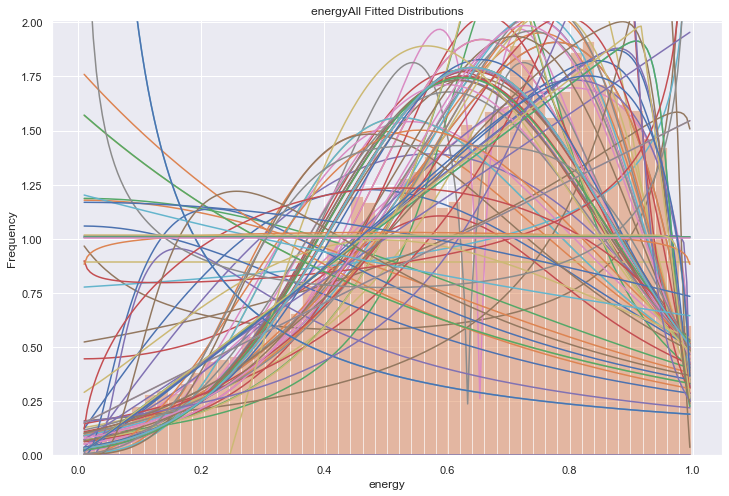

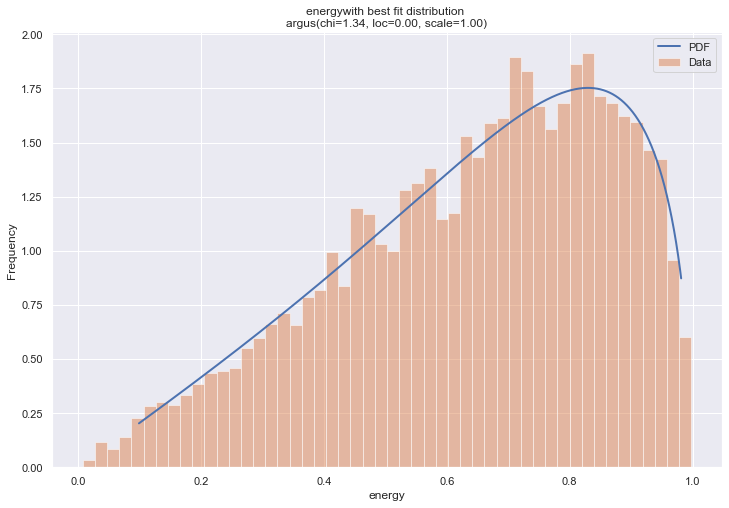

In [24]:
print(vars[1])
plot_distributions(vars[1])

loudness
  1 / 104: ksone
  2 / 104: kstwo
  3 / 104: kstwobign
  4 / 104: norm
  5 / 104: alpha
  6 / 104: anglit
  7 / 104: arcsine
  8 / 104: beta
  9 / 104: betaprime
 10 / 104: bradford
 11 / 104: burr
 12 / 104: burr12
 13 / 104: fisk
 14 / 104: cauchy
 15 / 104: chi
 16 / 104: chi2
 17 / 104: cosine
 18 / 104: dgamma
 19 / 104: dweibull
 20 / 104: expon
 21 / 104: exponnorm
 22 / 104: exponweib
 23 / 104: exponpow
 24 / 104: fatiguelife
 25 / 104: foldcauchy
 26 / 104: f
 27 / 104: foldnorm
 28 / 104: weibull_min
 29 / 104: weibull_max
 30 / 104: genlogistic
 31 / 104: genpareto
 32 / 104: genexpon
 33 / 104: genextreme
 34 / 104: gamma
 35 / 104: erlang
 36 / 104: gengamma
 37 / 104: genhalflogistic
 38 / 104: genhyperbolic
 39 / 104: gompertz
 40 / 104: gumbel_r
 41 / 104: gumbel_l
 42 / 104: halfcauchy
 43 / 104: halflogistic
 44 / 104: halfnorm
 45 / 104: hypsecant
 46 / 104: gausshyper
 47 / 104: invgamma
 48 / 104: invgauss
 49 / 104: geninvgauss
 50 / 104: norminvgauss
 5

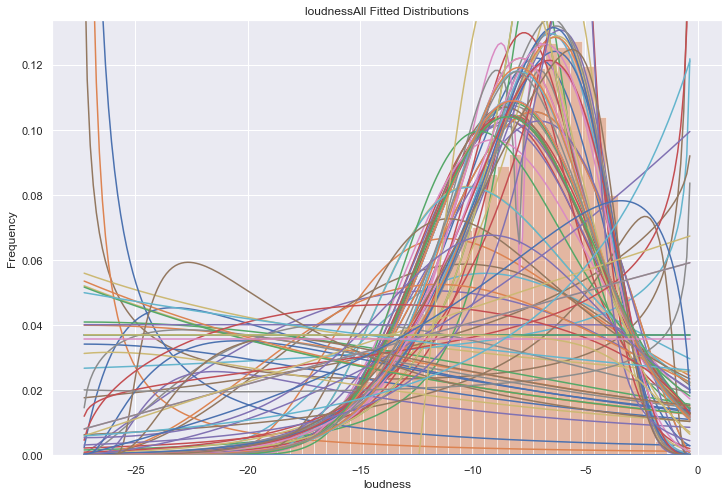

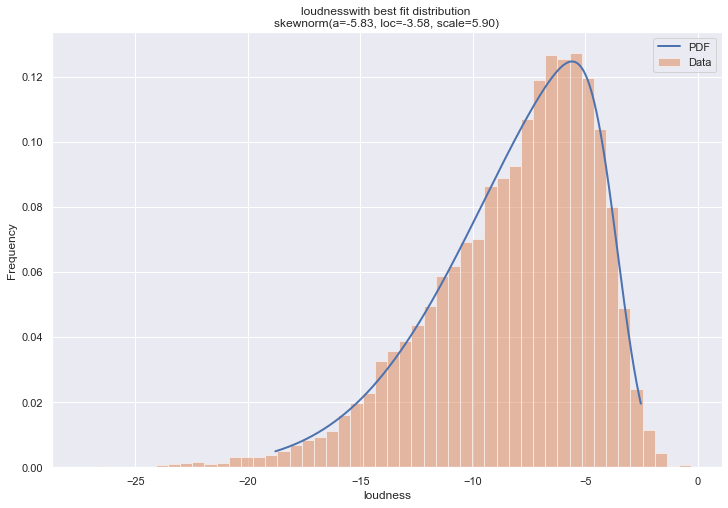

In [25]:
print(vars[3])
plot_distributions(vars[3])

acousticness
  1 / 104: ksone
  2 / 104: kstwo
  3 / 104: kstwobign
  4 / 104: norm
  5 / 104: alpha
  6 / 104: anglit
  7 / 104: arcsine
  8 / 104: beta
  9 / 104: betaprime
 10 / 104: bradford
 11 / 104: burr
 12 / 104: burr12
 13 / 104: fisk
 14 / 104: cauchy
 15 / 104: chi
 16 / 104: chi2
 17 / 104: cosine
 18 / 104: dgamma
 19 / 104: dweibull
 20 / 104: expon
 21 / 104: exponnorm
 22 / 104: exponweib
 23 / 104: exponpow
 24 / 104: fatiguelife
 25 / 104: foldcauchy
 26 / 104: f
 27 / 104: foldnorm
 28 / 104: weibull_min
 29 / 104: weibull_max
 30 / 104: genlogistic
 31 / 104: genpareto
 32 / 104: genexpon
 33 / 104: genextreme
 34 / 104: gamma
 35 / 104: erlang
 36 / 104: gengamma
 37 / 104: genhalflogistic
 38 / 104: genhyperbolic
 39 / 104: gompertz
 40 / 104: gumbel_r
 41 / 104: gumbel_l
 42 / 104: halfcauchy
 43 / 104: halflogistic
 44 / 104: halfnorm
 45 / 104: hypsecant
 46 / 104: gausshyper
 47 / 104: invgamma
 48 / 104: invgauss
 49 / 104: geninvgauss
 50 / 104: norminvgaus

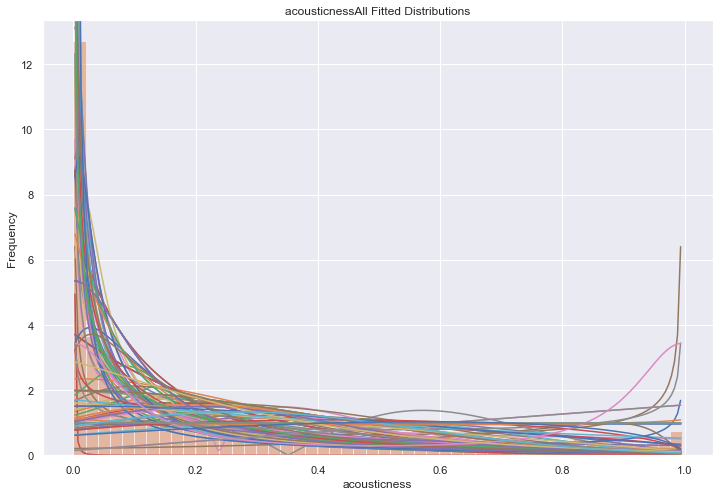

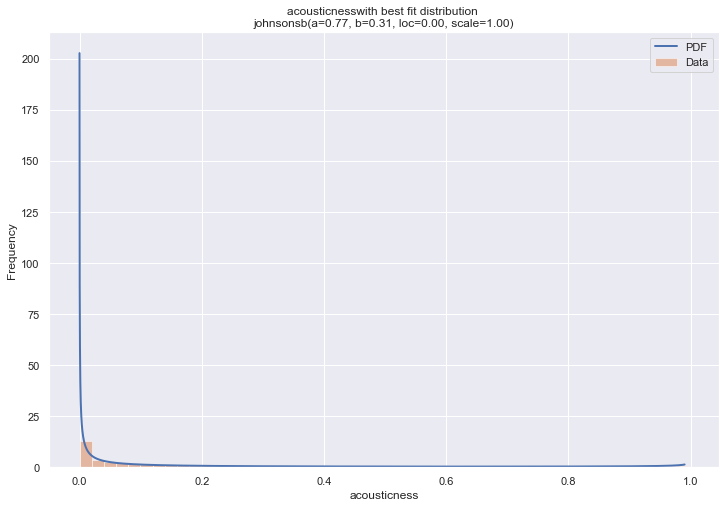

In [26]:
print(vars[5])
plot_distributions(vars[5])

valence
  1 / 104: ksone
  2 / 104: kstwo
  3 / 104: kstwobign
  4 / 104: norm
  5 / 104: alpha
  6 / 104: anglit
  7 / 104: arcsine
  8 / 104: beta
  9 / 104: betaprime
 10 / 104: bradford
 11 / 104: burr
 12 / 104: burr12
 13 / 104: fisk
 14 / 104: cauchy
 15 / 104: chi
 16 / 104: chi2
 17 / 104: cosine
 18 / 104: dgamma
 19 / 104: dweibull
 20 / 104: expon
 21 / 104: exponnorm
 22 / 104: exponweib
 23 / 104: exponpow
 24 / 104: fatiguelife
 25 / 104: foldcauchy
 26 / 104: f
 27 / 104: foldnorm
 28 / 104: weibull_min
 29 / 104: weibull_max
 30 / 104: genlogistic
 31 / 104: genpareto
 32 / 104: genexpon
 33 / 104: genextreme
 34 / 104: gamma
 35 / 104: erlang
 36 / 104: gengamma
 37 / 104: genhalflogistic
 38 / 104: genhyperbolic
 39 / 104: gompertz
 40 / 104: gumbel_r
 41 / 104: gumbel_l
 42 / 104: halfcauchy
 43 / 104: halflogistic
 44 / 104: halfnorm
 45 / 104: hypsecant
 46 / 104: gausshyper
 47 / 104: invgamma
 48 / 104: invgauss
 49 / 104: geninvgauss
 50 / 104: norminvgauss
 51

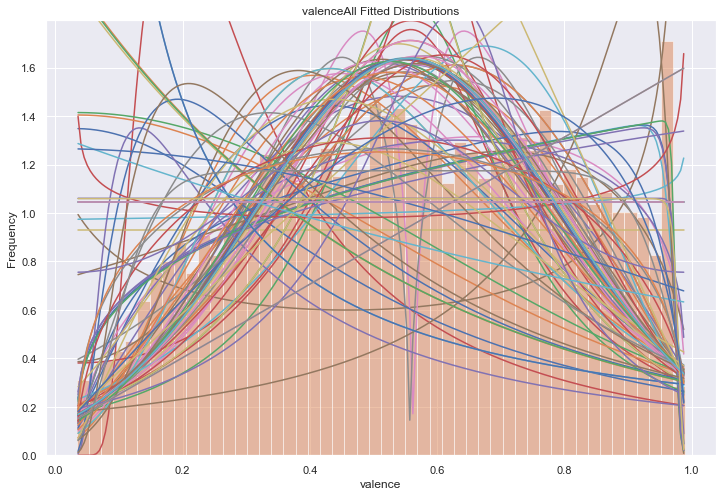

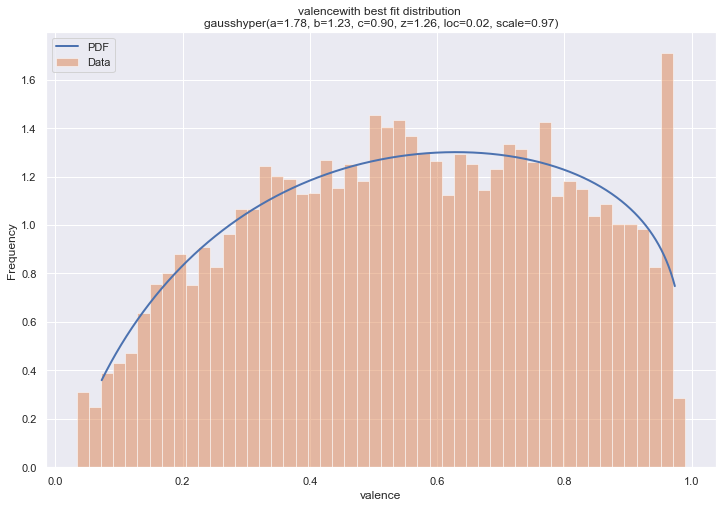

In [27]:
print(vars[6])
plot_distributions(vars[6])